# Predicción de los salarios usando Random Forest


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lee la base de datos
url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/hitters.csv'
hitters = pd.read_csv(url)

# elimina las filas con valores faltantes
hitters.dropna(inplace=True)
hitters.head()

# codifica las variables categoricas
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]


feature_cols = hitters.columns[hitters.columns.str.startswith('C') == False].drop('Salary')
feature_cols

# definir X y Y
X = hitters[feature_cols]
y = (hitters.Salary > 425).astype(int)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [3]:
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.843875
std       0.046656
min       0.769231
25%       0.807692
50%       0.849003
75%       0.876425
max       0.923077
dtype: float64

### Calibrar n_estimators

Un parámetro de ajuste importante es **n_estimators**, que es la cantidad de árboles que deben crecer. Debe ser un valor lo suficientemente grande como para que el error parezca haberse "estabilizado".

In [5]:
# Lista para iterar: n_estimators
estimator_range = range(10, 310, 10)

# lista para almacenar la Accuracy promedio para cada valor de n_estimators
accuracy_scores = []

# Usa un 5-fold cross-validation para cada valor de n_estimators (Nota:¡Puede ser lento!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

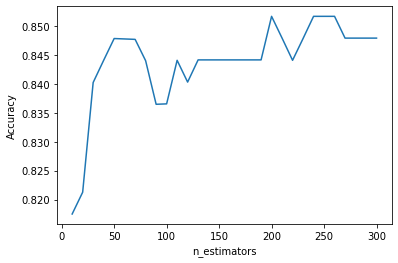

In [8]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

### Calibrar max_features

El otro parámetro de ajuste importante es **max_features**, que es el número de variables que se deben considerar en cada árbol.

In [9]:
# lista de valores para iterar: max_features
feature_range = range(1, len(feature_cols)+1)

#  lista para almacenar la Accuracy promedio para cada valor de max_features
accuracy_scores = []

# Usa un 10-fold cross-validation para cada valor de max_features (Nota:¡Puede ser lento!) 
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=200, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

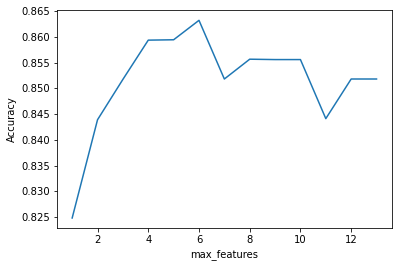

In [10]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

### Ajustando Random Forest con los mejores parámetros

In [11]:
# max_features=6 y n_estimators=200 
clf = RandomForestClassifier(n_estimators=200, max_features=6, random_state=1, n_jobs=-1)
clf.fit(X, y)

RandomForestClassifier(max_features=6, n_estimators=200, n_jobs=-1,
                       random_state=1)

In [12]:
# Importancia de las variables 
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
8,Division,0.006081
7,League,0.008834
12,NewLeague,0.009709
11,Errors,0.032638
10,Assists,0.040503
2,HmRun,0.047118
9,PutOuts,0.051506
0,AtBat,0.078822
3,Runs,0.080185
5,Walks,0.082160
